# Entrenamiento Metodo 1 

Probamos primeramente con una arquitectura de SVM

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Precisión del modelo SVM: 87.74%

Reporte de Clasificación:
                   precision    recall  f1-score   support

    AndresCalzada       1.00      0.88      0.93         8
     ArathDaniela       1.00      0.67      0.80         3
           Ariana       1.00      1.00      1.00         3
           Camila       1.00      1.00      1.00         6
            Cielo       1.00      0.56      0.71         9
           DafneA       0.40      1.00      0.57         2
           Daniel       1.00      1.00      1.00         3
          Daniel2       1.00      1.00      1.00         2
            David       1.00      1.00      1.00         3
           Didier       0.80      0.80      0.80         5
             Erik       1.00      1.00      1.00         3
           Esther       1.00      1.00      1.00         5
        Francisco       1.00      0.67      0.80         3
          Ignacio       0.50      1.00      0.67         1
             Irma       1.00      1.00      1.00      

C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


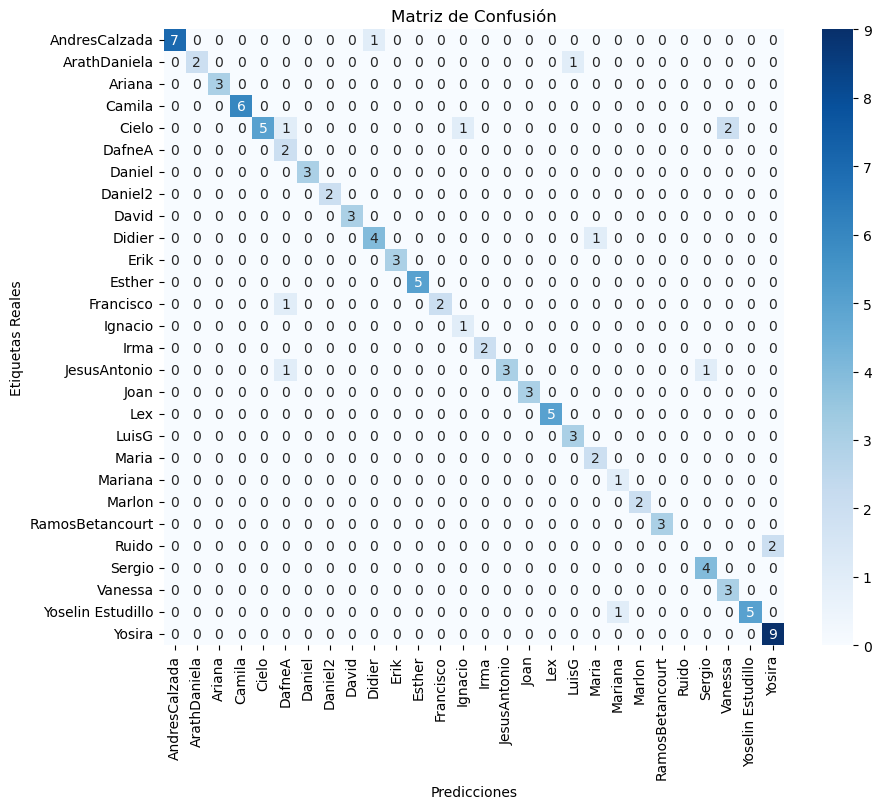

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


csv_path = "mfcc_featMethod1.csv"  
df = pd.read_csv(csv_path)

X = df.drop(columns=["Label"])  
y = df["Label"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svmRbf_model = SVC(kernel="rbf", random_state=42)  
svmRbf_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy * 100:.2f}%")


print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svmRbf_model.classes_, yticklabels=svmRbf_model.classes_)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Reales")
plt.title("Matriz de Confusión")
plt.show()

In [83]:
import joblib

# Guardar el modelo
model_path = "1udioVoiceData"
joblib.dump(svm_model, model_path)

print(f"Modelo guardado en: {model_path}")

Modelo guardado en: 1udioVoiceData


# Testing en tiempo real

In [91]:
import sounddevice as sd
import numpy as np
import librosa
import joblib
from scipy.io.wavfile import write


sample_rate = 16000  
duration = 3  
model_path = "1udioVoiceData"  


svm_model = joblib.load(model_path)


def record_audio():
    print("Grabando... Habla ahora.")
    audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
    sd.wait()  
    print("Grabación terminada.")
    return audio.flatten()


def extract_mfcc(audio, sr):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)  
    return mfcc_mean.reshape(1, -1) 


audio = record_audio()
write("grabacion.wav", sample_rate, audio)
mfcc = extract_mfcc(audio, sample_rate)

prediction = svm_model.predict(mfcc)
print(f"El modelo predice que eres: {prediction[0]}")

Grabando... Habla ahora.
Grabación terminada.
El modelo predice que eres: LuisG


C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Train Model MFCC, Mel espectogram y Crhoma

In [3]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


csv_path = "mfcc_features3.csv"
df = pd.read_csv(csv_path)


X = df.drop(columns=["Label"])  
y = df["Label"]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


svm_model3 = SVC(kernel="linear", random_state=42)
svm_model3.fit(X_train, y_train)


y_pred = svm_model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy * 100:.2f}%")


print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo SVM: 87.50%

Reporte de Clasificación:
                   precision    recall  f1-score   support

    AndresCalzada       0.86      1.00      0.92         6
     ArathDaniela       1.00      1.00      1.00         2
           Ariana       0.00      0.00      0.00         1
           Camila       0.75      1.00      0.86         6
            Cielo       1.00      0.62      0.77         8
           DafneA       0.67      1.00      0.80         2
           Daniel       0.50      1.00      0.67         2
          Daniel2       0.67      1.00      0.80         2
            David       1.00      0.67      0.80         3
           Didier       1.00      0.75      0.86         4
             Erik       1.00      1.00      1.00         2
           Esther       1.00      1.00      1.00         5
        Francisco       0.00      0.00      0.00         1
          Ignacio       1.00      1.00      1.00         1
             Irma       1.00      1.00      1.00      

C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


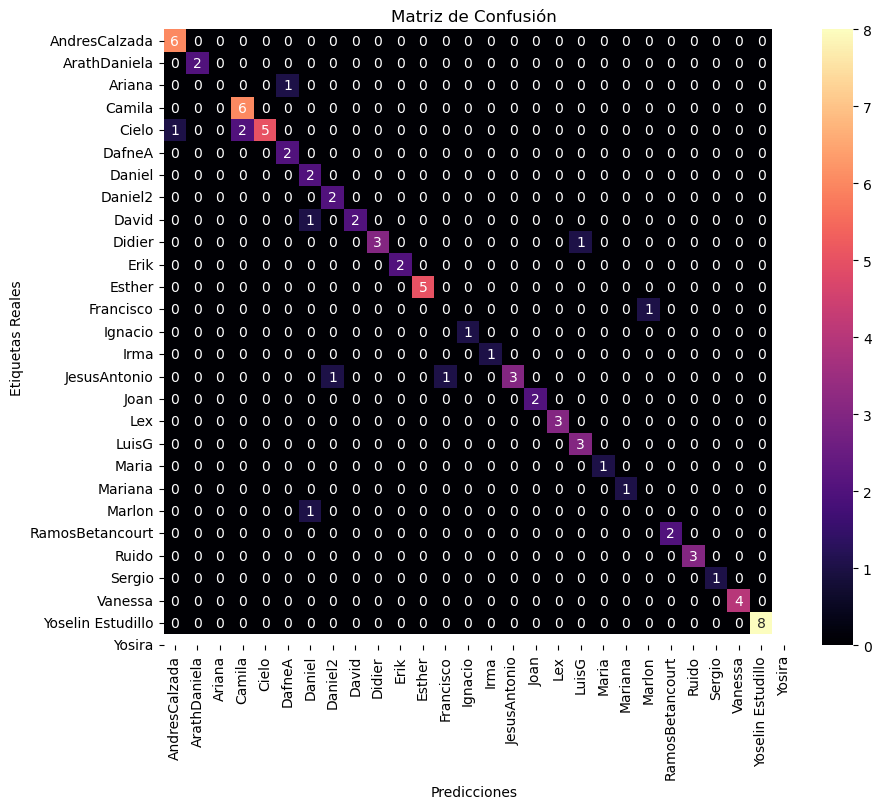

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="magma", xticklabels=svm_model3.classes_, yticklabels=svm_model3.classes_)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Reales")
plt.title("Matriz de Confusión")
plt.show()

### Ya que se han encontrado errores en la prueba externa del modelo se aplica PCA a nuestros datos

Entrenamos nuevamente el modelo

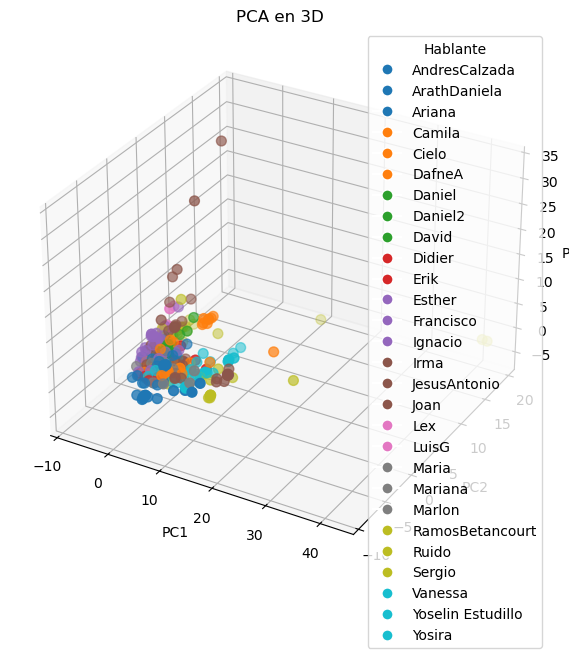

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("mfcc_features3.csv")

X = df.drop(columns=["Label"])
y = df["Label"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])
pca_df["Label"] = y

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], c=pd.factorize(pca_df["Label"])[0], cmap="tab10", s=50)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA en 3D")

legend_labels = {i: label for i, label in enumerate(pd.factorize(pca_df["Label"])[1])}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i], markersize=8, markerfacecolor=scatter.to_rgba(i)) for i in legend_labels]
ax.legend(handles=legend_handles, title="Hablante", loc="upper right")

plt.show()


plt.show()


# Entrenamiento RandomForest con PCA

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


rfb_model = RandomForestClassifier(n_estimators=200, random_state=42)
rfb_model.fit(X_train, y_train)
y_pred_rf = rfb_model.predict(X_test)


print(classification_report(y_test, y_pred_rf))


                   precision    recall  f1-score   support

    AndresCalzada       0.50      0.50      0.50         2
     ArathDaniela       0.33      0.50      0.40         2
           Ariana       1.00      1.00      1.00         2
           Camila       1.00      1.00      1.00         2
            Cielo       1.00      0.50      0.67         2
           DafneA       0.00      0.00      0.00         2
           Daniel       0.67      1.00      0.80         2
          Daniel2       1.00      1.00      1.00         2
            David       0.50      1.00      0.67         1
           Didier       1.00      0.50      0.67         2
             Erik       1.00      1.00      1.00         2
           Esther       0.25      0.50      0.33         2
        Francisco       1.00      0.50      0.67         2
          Ignacio       0.50      1.00      0.67         1
             Irma       0.40      1.00      0.57         2
     JesusAntonio       1.00      1.00      1.00       

C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andyl\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


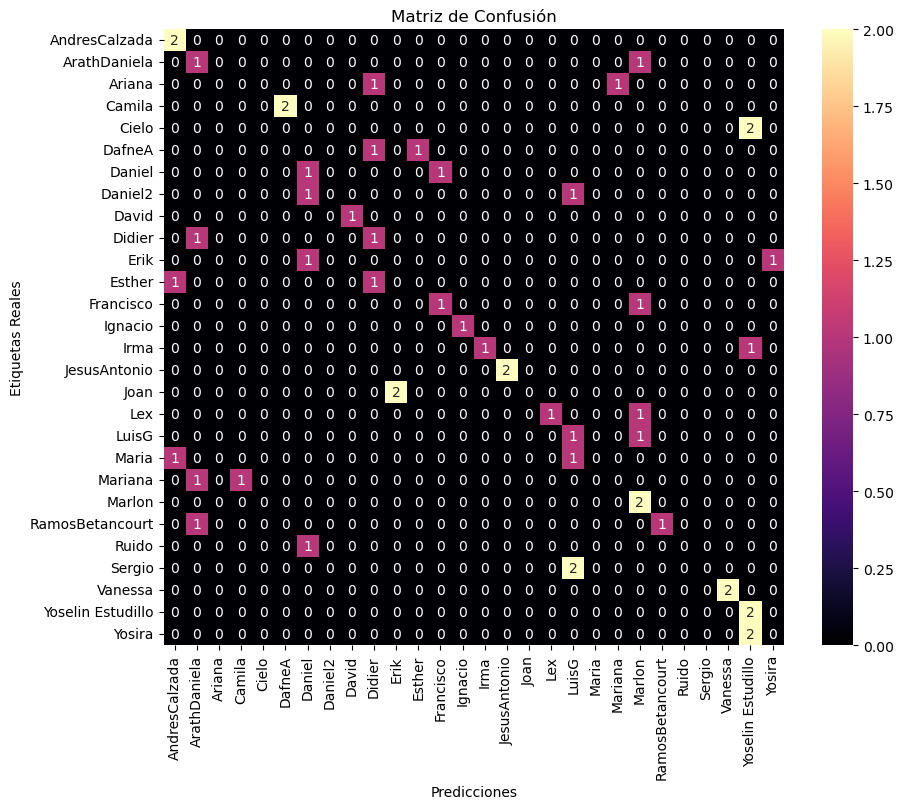

In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="magma", xticklabels=rfb_model.classes_, yticklabels=rfb_model.classes_)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Reales")
plt.title("Matriz de Confusión")
plt.show()